In [1]:
import pandas as pd
import glob
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

## Using the exactly file name

In [2]:
df = pd.read_csv('baseball.csv')
display(df.head())
display(df.tail())

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN
1231,WSA,AL,1962,599,716,60,0.308,0.373,0.250,0,NaN,NaN,162,NaN,NaN


## Using a generic way to find a csv file

In [3]:
file = glob.glob('*.csv')
# for file in files:
df = pd.read_csv(file[0])
display(df.head())
display(df.tail())

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN
1231,WSA,AL,1962,599,716,60,0.308,0.373,0.250,0,NaN,NaN,162,NaN,NaN


In [4]:
df.describe()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,244.000000,244.000000,1232.000000,420.000000,420.000000
mean,1988.957792,715.081981,715.081981,80.904221,0.326331,0.397342,0.259273,0.198052,3.122951,2.717213,161.918831,0.332264,0.419743
std,14.819625,91.534294,93.079933,11.458139,0.015013,0.033267,0.012907,0.398693,1.738349,1.095234,0.624365,0.015295,0.026510
min,1962.000000,463.000000,472.000000,40.000000,0.277000,0.301000,0.214000,0.000000,1.000000,1.000000,158.000000,0.294000,0.346000
25%,1976.750000,652.000000,649.750000,73.000000,0.317000,0.375000,0.251000,0.000000,2.000000,2.000000,162.000000,0.321000,0.401000
50%,1989.000000,711.000000,709.000000,81.000000,0.326000,0.396000,0.260000,0.000000,3.000000,3.000000,162.000000,0.331000,0.419000
75%,2002.000000,775.000000,774.250000,89.000000,0.337000,0.421000,0.268000,0.000000,4.000000,4.000000,162.000000,0.343000,0.438000
max,2012.000000,1009.000000,1103.000000,116.000000,0.373000,0.491000,0.294000,1.000000,8.000000,5.000000,165.000000,0.384000,0.499000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [6]:
df.isnull().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      988
RankPlayoffs    988
G                 0
OOBP            812
OSLG            812
dtype: int64

<AxesSubplot:>

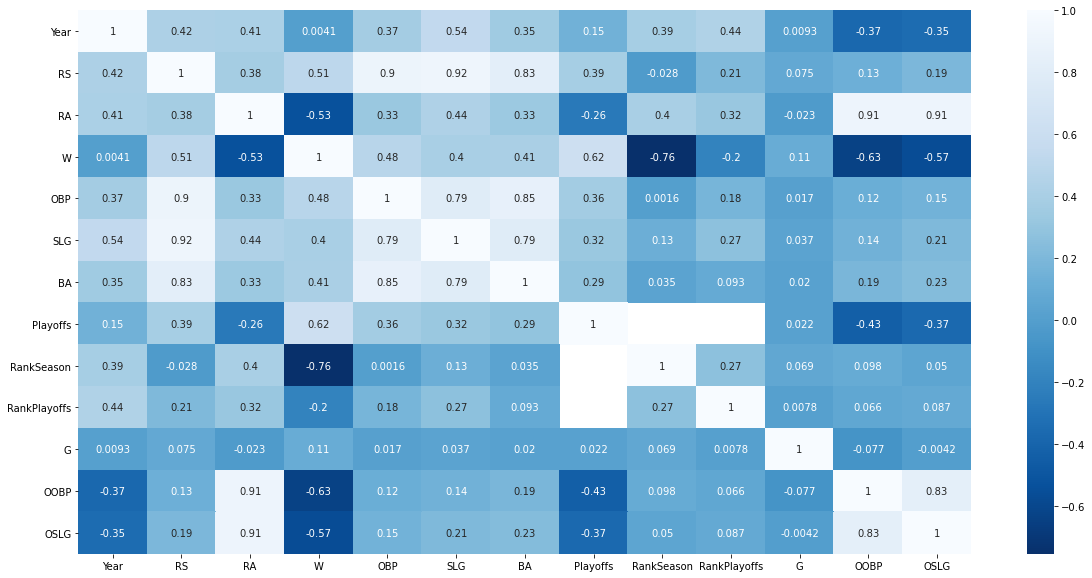

In [7]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='Blues_r')

## Como 'OOBP' e 'OSLG' sao stats so validas a partir de 1999, as colunas vao ser dropadas

In [8]:
df.drop(['OOBP', 'OSLG'], axis=1, inplace=True)
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162


## Replace NaN in columns 'RankSeason' and 'RankPlayoffs' for zero

In [9]:
df.fillna(0, inplace=True)
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,0.0,0.0,162
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,0.0,0.0,162
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,0.0,0.0,162


<AxesSubplot:>

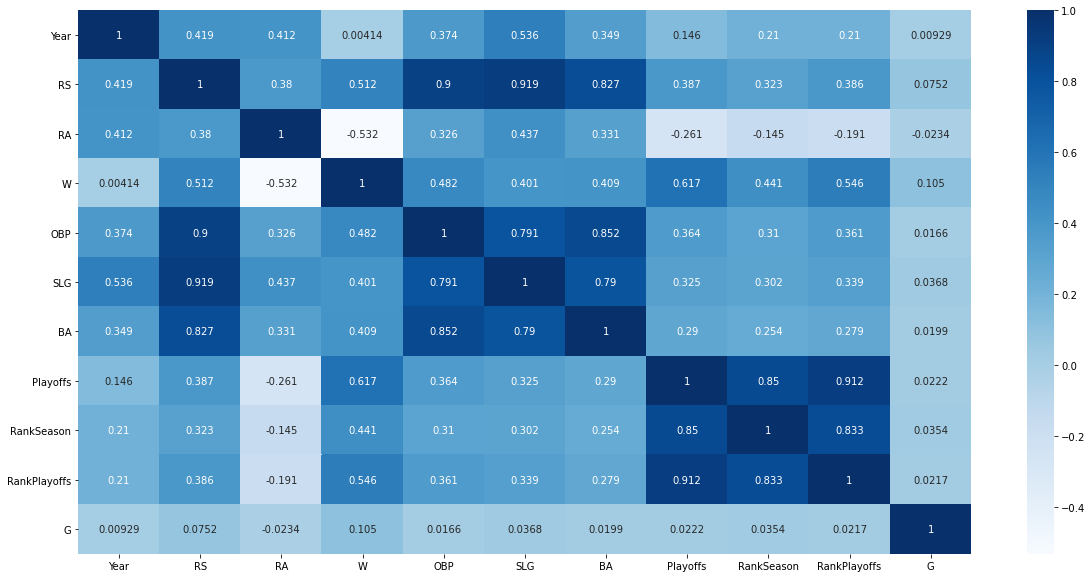

In [10]:
plt.figure(figsize=(20, 10))
sns.heatmap(data=df.corr(), annot=True, cmap='Blues', fmt='.3g')

In [11]:
def barplot(df, x: str, y: str, hue: str = None, palette: str = None):
    ax = sns.barplot(x = x, y = y, hue = hue, data = df, palette=palette)
    ax.figure.set_size_inches(27, 8)    # Personalizando o tamanho da figura
    ax.set_title('Quantidade de {} por {}'.format(y, x), fontsize=18)    # Configurando o título do gráfico
    ax.set_xlabel(x, fontsize=14)    # Configurando o label do eixo X
    ax.set_ylabel(y, fontsize=14)    # Configurando o label do eixo Y
    ax.grid()

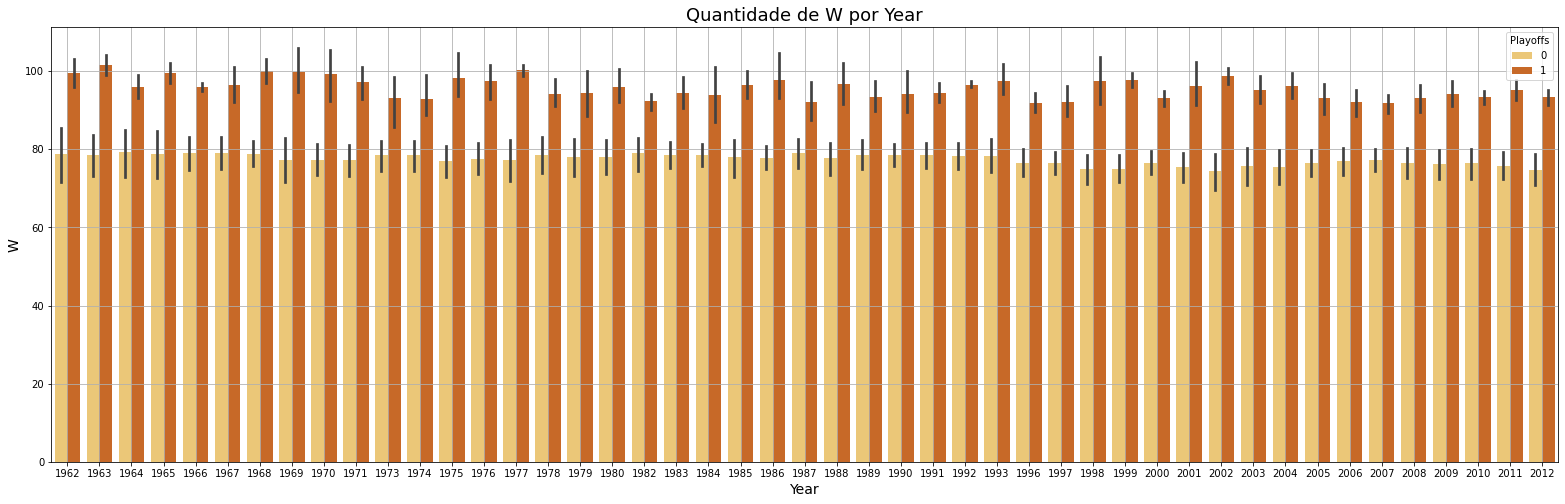

In [12]:
barplot(df, 'Year', 'W', 'Playoffs', 'YlOrBr')

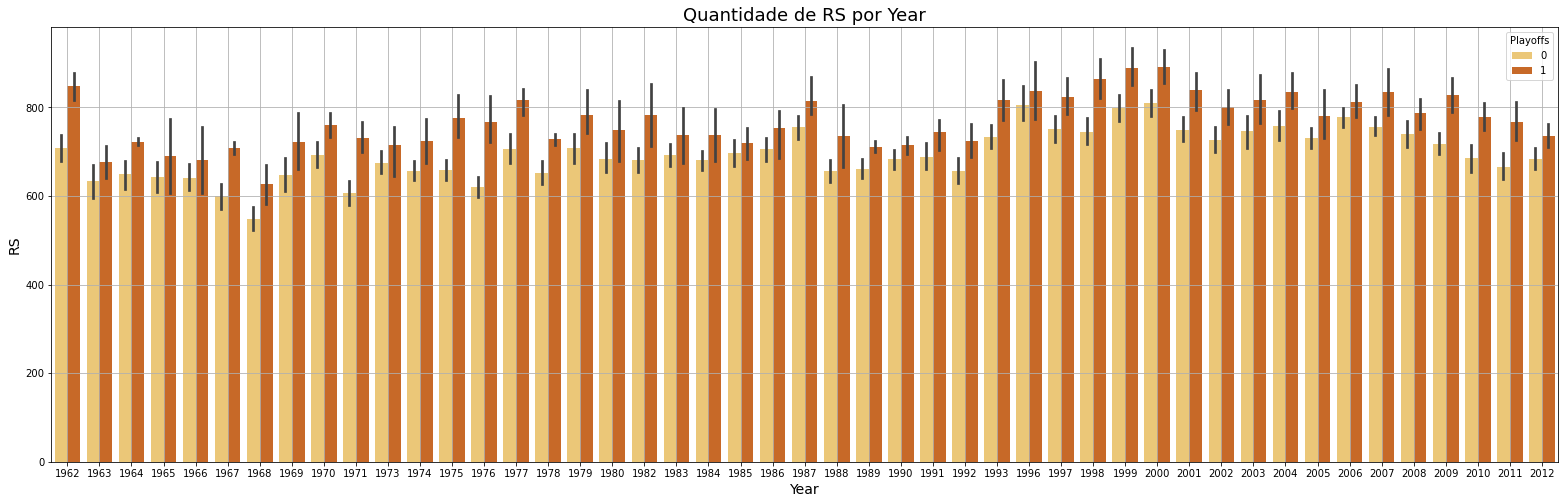

In [13]:
barplot(df, 'Year', 'RS', 'Playoffs', 'YlOrBr')

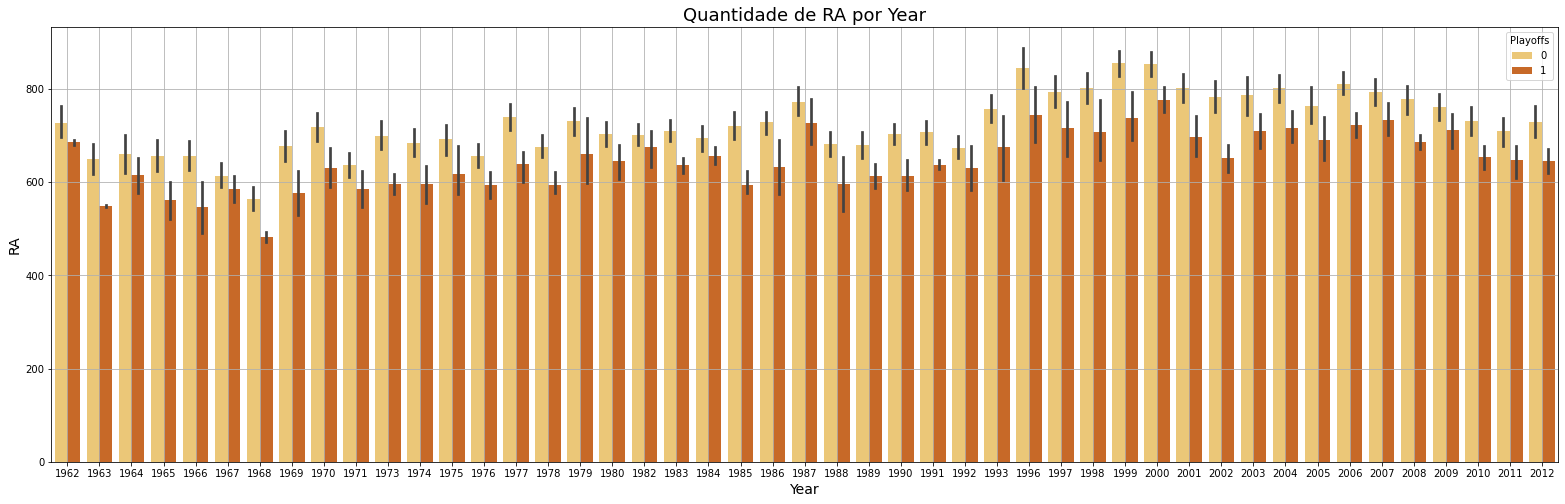

In [14]:
barplot(df, 'Year', 'RA', 'Playoffs', 'YlOrBr')

In [15]:
def boxplot(df, x: str, y: str, hue: str = None, palette: str = None):
    ax = sns.boxplot(x = x, y = y, hue = hue, data = df, palette=palette)
    ax.figure.set_size_inches(27, 8)    # Personalizando o tamanho da figura
    ax.set_title('Quantidade de {} por {}'.format(y, x), fontsize=18)    # Configurando o título do gráfico
    ax.set_xlabel(x, fontsize=14)    # Configurando o label do eixo X
    ax.set_ylabel(y, fontsize=14)    # Configurando o label do eixo Y
    ax.grid()

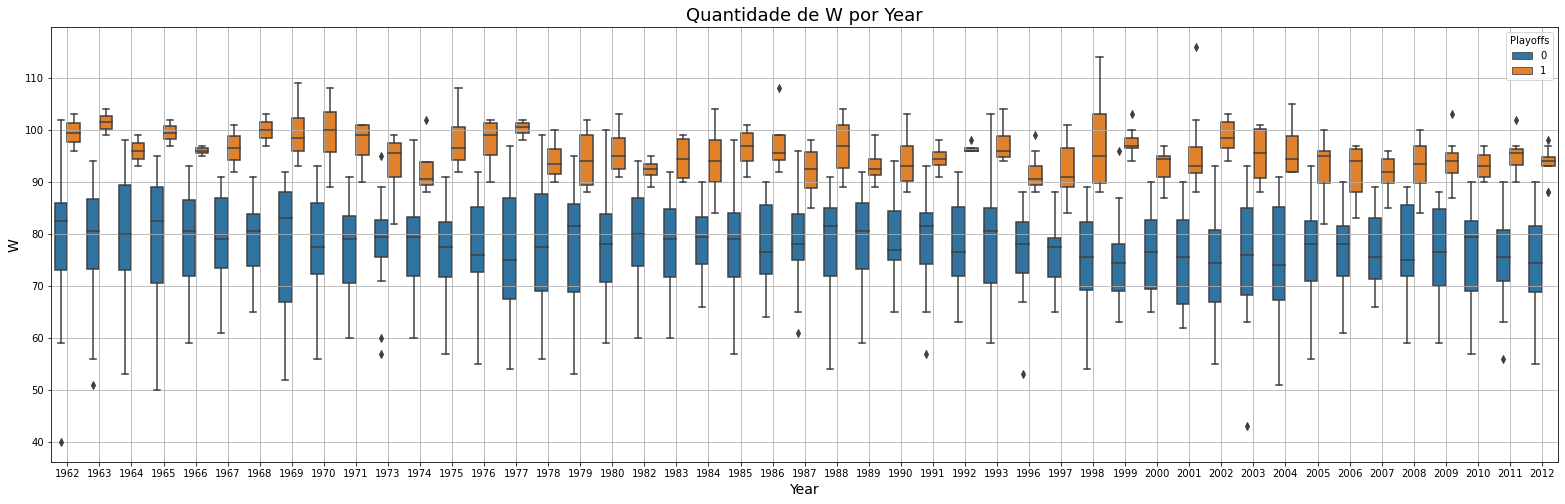

In [16]:
boxplot(df, 'Year', 'W', 'Playoffs')

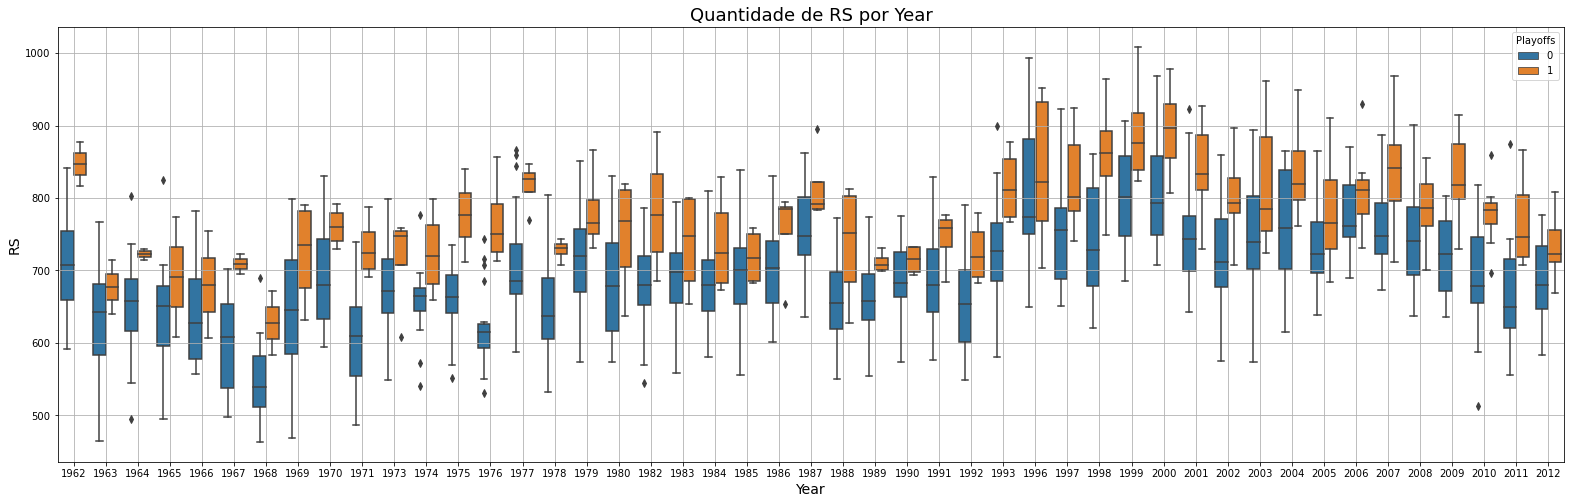

In [17]:
boxplot(df, 'Year', 'RS', 'Playoffs')

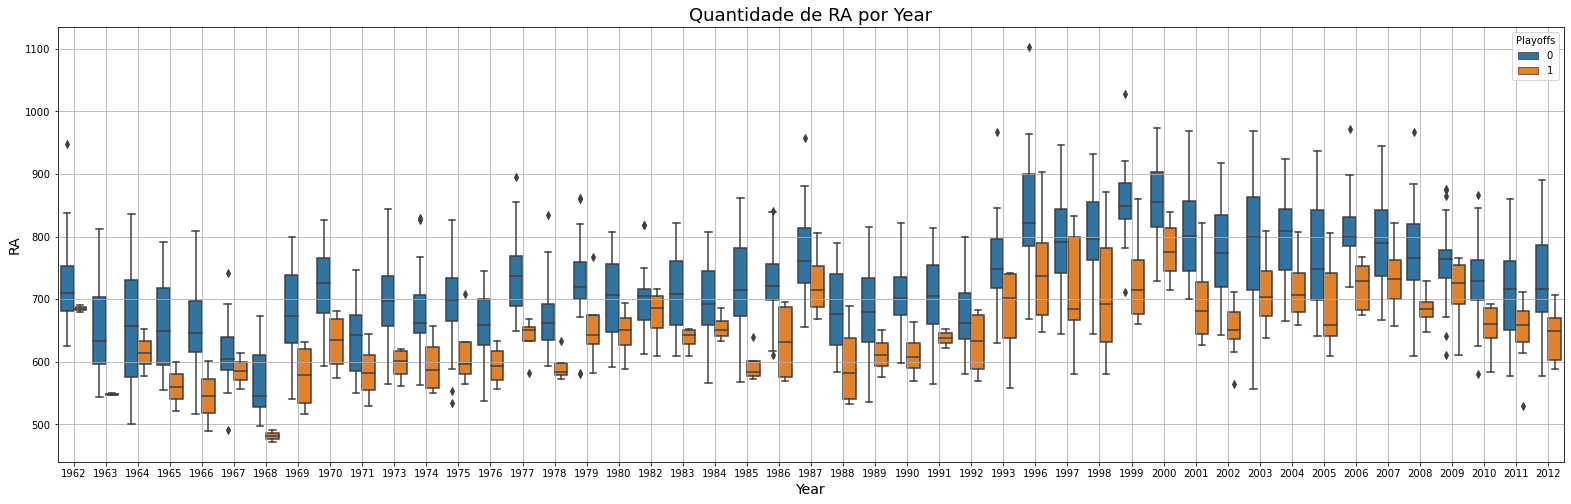

In [18]:
boxplot(df, 'Year', 'RA', 'Playoffs')

## Fazendo agrupamento

In [19]:
columns_group = ['RS', 'RA', 'W', 'OBP', 'SLG', 'BA']

In [20]:
by_league = df[columns_group].groupby(by=df.League).mean()
by_league

,RS,RA,W,OBP,SLG,BA
League,,,,,,
AL,732.399351,730.495130,81.034091,0.328545,0.402635,0.261308
NL,697.764610,699.668831,80.774351,0.324117,0.392049,0.257237


In [21]:
by_team = df[columns_group].groupby(by=df.Team).mean()
by_team

,RS,RA,W,OBP,SLG,BA
Team,,,,,,
ANA,788.125000,765.375000,83.000000,0.336750,0.422250,0.271625
ARI,742.200000,748.466667,80.666667,0.328733,0.419600,0.258267
ATL,710.441860,684.279070,83.395349,0.325767,0.396860,0.257930
BAL,726.702128,710.212766,83.361702,0.328723,0.403149,0.258830
BOS,781.489362,729.148936,85.893617,0.339553,0.423681,0.269511
CAL,660.428571,688.928571,78.178571,0.318786,0.370321,0.251750
CHC,695.191489,727.021277,77.425532,0.321426,0.395021,0.257277
CHW,718.276596,711.659574,81.659574,0.325404,0.397426,0.259234
CIN,722.297872,706.085106,84.021277,0.326660,0.401787,0.258766


## Champions by year and sum

In [22]:
champions = df.query('RankPlayoffs == 1')
champions.reset_index(drop=True, inplace=True)
champions

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G
0,SFG,NL,2012,718,649,94,0.327,0.397,0.269,1,4.0,1.0,162
1,STL,NL,2011,762,692,90,0.341,0.425,0.273,1,7.0,1.0,162
2,SFG,NL,2010,697,583,92,0.321,0.408,0.257,1,5.0,1.0,162
3,NYY,AL,2009,915,753,103,0.362,0.478,0.283,1,1.0,1.0,162
4,PHI,NL,2008,799,680,92,0.332,0.438,0.255,1,4.0,1.0,162
5,BOS,AL,2007,867,657,96,0.362,0.444,0.279,1,1.0,1.0,162
6,STL,NL,2006,781,762,83,0.337,0.431,0.269,1,6.0,1.0,161
7,CHW,AL,2005,741,645,99,0.322,0.425,0.262,1,2.0,1.0,162
8,BOS,AL,2004,949,768,98,0.360,0.472,0.282,1,3.0,1.0,162
9,FLA,NL,2003,751,692,91,0.333,0.421,0.266,1,5.0,1.0,162


In [23]:
champions.Team.value_counts()

NYY    8
STL    5
BAL    3
CIN    3
OAK    3
LAD    3
PHI    2
SFG    2
PIT    2
FLA    2
TOR    2
MIN    2
BOS    2
NYM    2
DET    2
ARI    1
ANA    1
CHW    1
KCR    1
Name: Team, dtype: int64

In [24]:
champions.League.value_counts()

AL    25
NL    22
Name: League, dtype: int64

## Playoffs

In [25]:
playoffs = df.query('Playoffs == 1')
playoffs.reset_index(drop=True, inplace=True)
playoffs.Team.value_counts()

NYY    23
ATL    17
STL    16
LAD    14
OAK    14
BOS    13
MIN    11
BAL    11
PHI    11
SFG    10
HOU     8
PIT     8
CIN     8
NYM     7
KCR     6
CLE     6
CHC     6
TEX     6
DET     6
CHW     5
ARI     5
TOR     5
SDP     5
LAA     4
TBR     3
MIL     3
CAL     3
SEA     3
FLA     2
ANA     2
COL     2
WSN     1
Name: Team, dtype: int64

In [26]:
def sort_by(df, column: str):
    column = column.upper()
    columns_group = ['RS', 'RA', 'W', 'OBP', 'SLG', 'BA']
    by_team = df[columns_group].groupby(by=df.Team).mean()
    return by_team.sort_values(by=column, ascending=False)

In [27]:
for column in columns_group:
    print(sort_by(df, column))

              RS          RA          W       OBP       SLG        BA
Team                                                                 
COL   830.888889  866.000000  76.166667  0.343000  0.443000  0.275833
ANA   788.125000  765.375000  83.000000  0.336750  0.422250  0.271625
BOS   781.489362  729.148936  85.893617  0.339553  0.423681  0.269511
TEX   772.756757  777.864865  79.945946  0.333000  0.418378  0.267892
NYY   770.787234  686.021277  90.255319  0.335426  0.411851  0.264596
TBR   756.600000  653.000000  91.600000  0.331000  0.412000  0.250800
TOR   753.000000  740.636364  81.212121  0.327939  0.418091  0.263091
ARI   742.200000  748.466667  80.666667  0.328733  0.419600  0.258267
DET   736.808511  745.191489  80.276596  0.327319  0.408255  0.259085
MIN   735.063830  724.808511  81.723404  0.330936  0.401532  0.266149
OAK   733.780488  708.560976  84.097561  0.328415  0.394976  0.254415
MLN   729.500000  661.250000  86.000000  0.320250  0.401750  0.256000
BAL   726.702128  71

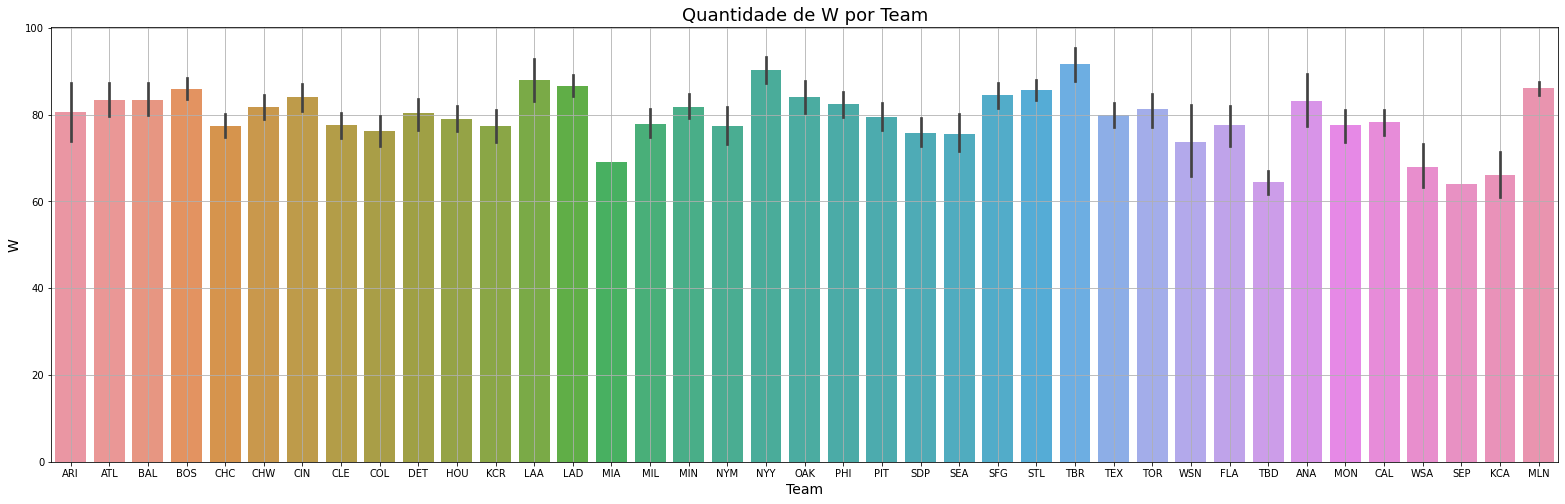

In [28]:
barplot(df, 'Team', 'W')

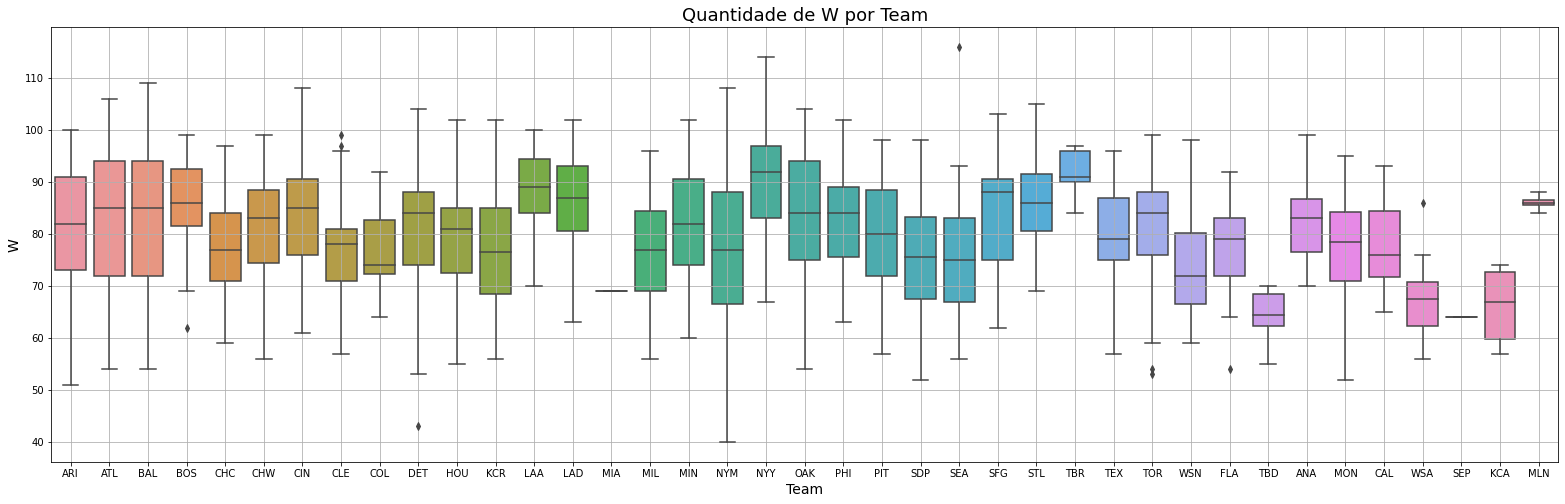

In [29]:
boxplot(df, 'Team', 'W')

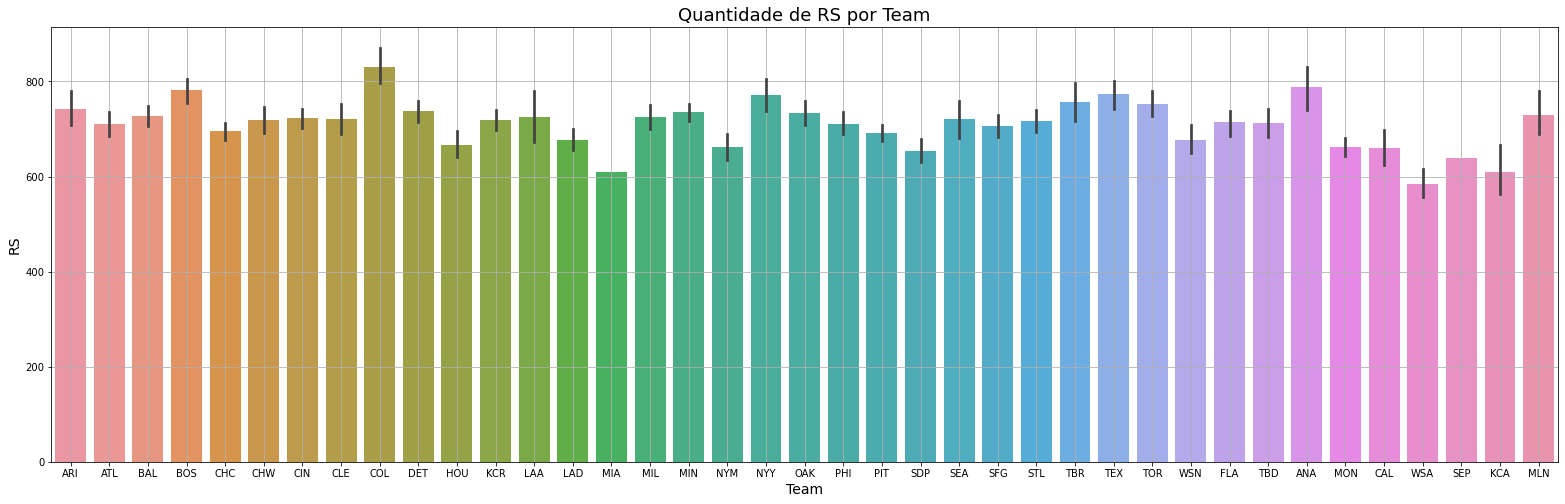

In [30]:
barplot(df, 'Team', 'RS')

# Analisando a linearidade das variáveis

### Em construcao...

In [31]:
def lmplot(y: str):
    ax = sns.lmplot(x = 'W', y = y, data = df, hue = "Playoffs", height=8, palette='YlOrBr')

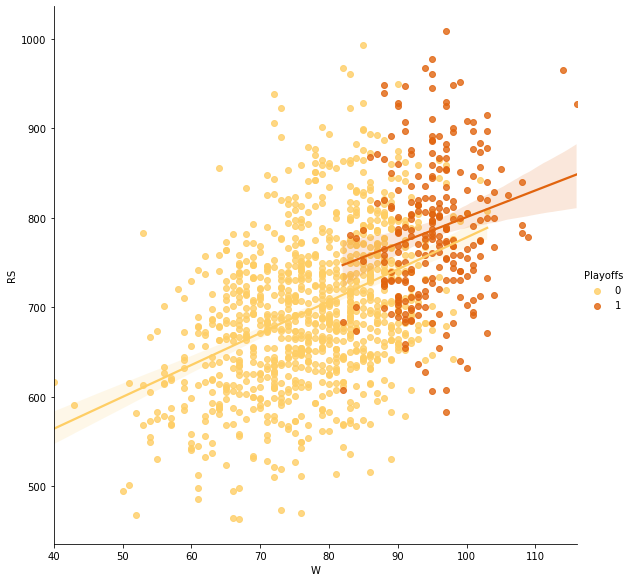

In [32]:
lmplot('RS')

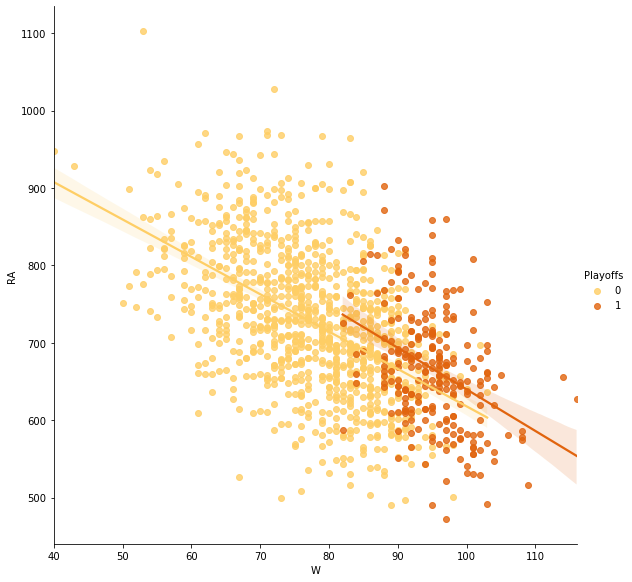

In [33]:
lmplot('RA')

# Fazendo plots por categorias

### Em construcao...

In [34]:
ax = sns.catplot(x = 'Year', y = 'W', hue = 'Playoffs',
                 data = df1.query('2002 < Year < 2012 '),
                 col = "League", kind = "box", height=10)

NameError: name 'df1' is not defined

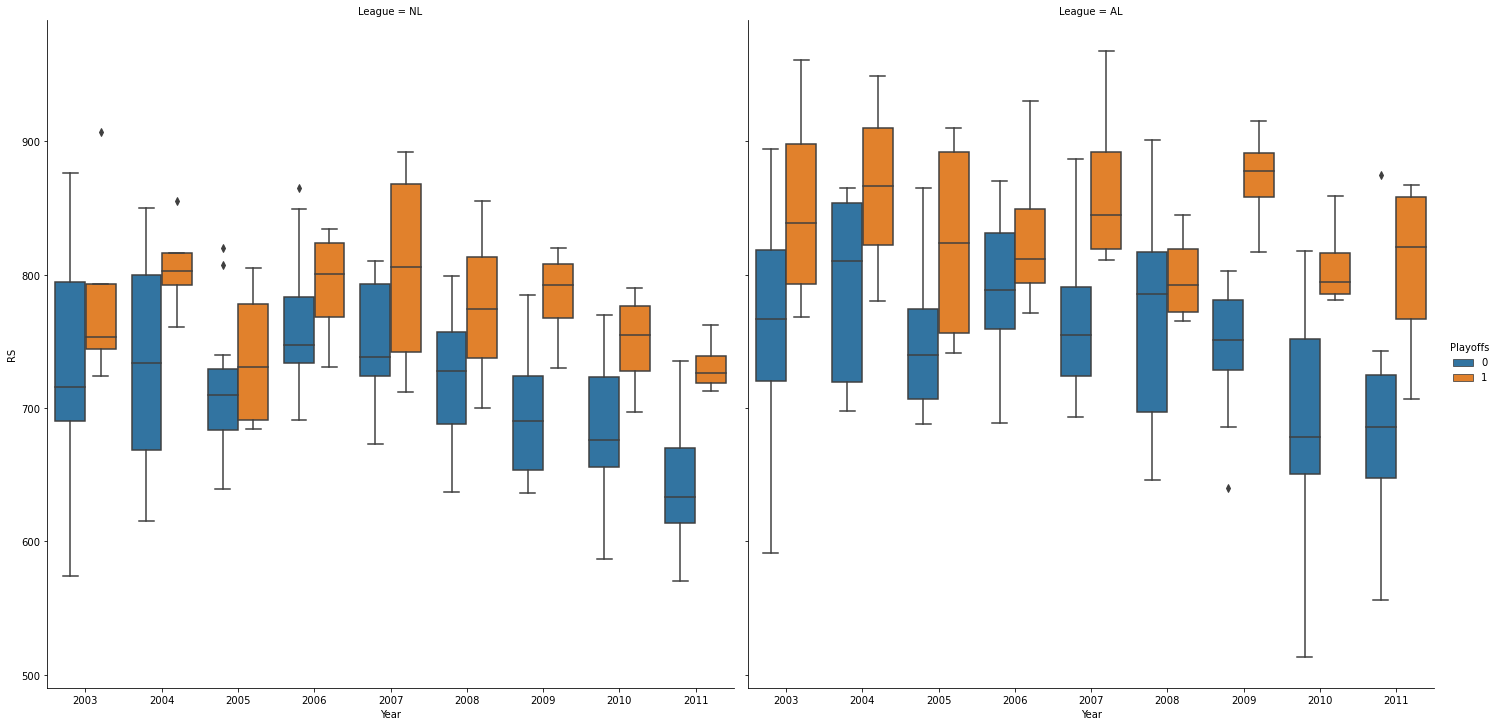

In [63]:
ax = sns.catplot(x = 'Year', y = 'RS', hue = 'Playoffs',
                 data = df1.query('2002 < Year < 2012 '),
                 col = "League", kind = "box", height=10)

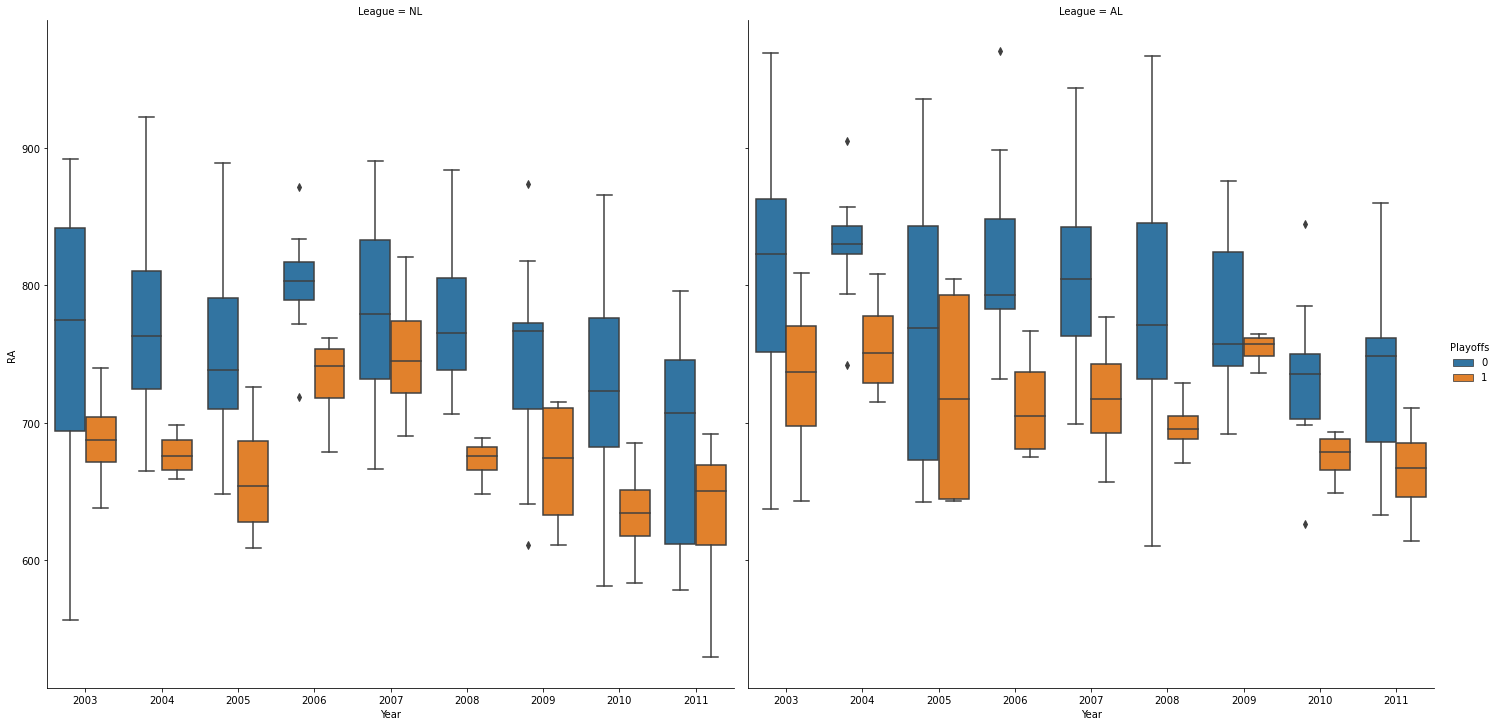

In [64]:
ax = sns.catplot(x = 'Year', y = 'RA', hue = 'Playoffs',
                 data = df1.query('2002 < Year < 2012 '),
                 col = "League", kind = "box", height=10)

## Analisando o saldo de corridas dos times

In [62]:
Residuo = pd.concat([df.Team, df.Year, df.RS, df.RA], axis=1, join='inner')
Residuo['Residuo'] = (df.RS - df.RA)
Residuo['W'] = df.W
Residuo['Playoffs'] = df.Playoffs
Residuo.sample(10)

,Team,Year,RS,RA,Residuo,W,Playoffs
1162,LAD,1965,608,521,87,97,1
944,SDP,1976,570,662,-92,73,0
1084,OAK,1969,740,678,62,88,0
1010,MON,1973,668,702,-34,79,0
23,SEA,2012,619,651,-32,75,0
895,STL,1978,600,657,-57,69,0
531,STL,1993,758,744,14,87,0
539,CHW,1992,738,690,48,86,0
741,TOR,1985,759,588,171,99,1
279,COL,2003,853,892,-39,74,0


## Times que conseguiram ir para PO com saldo de corridas negativo

In [63]:
Residuo_Playoffs = Residuo[Residuo.Playoffs != 0]
Residuo_Playoffs_negative = Residuo_Playoffs[Residuo_Playoffs.Residuo <= 0]
Residuo_Playoffs_negative.set_index('Team')

,Year,RS,RA,Residuo,W,Playoffs
Team,,,,,,
ARI,2007,712,732,-20,90,1
SDP,2005,684,726,-42,82,1
SFG,1997,784,793,-9,90,1
MIN,1987,786,806,-20,85,1
KCR,1984,673,686,-13,84,1


## Importância das Variáveis

In [59]:
def variable_importance(df, y: str):
    df_raw = df.fillna(0)
    df_raw.drop(['League','Year', 'Team', 'G'], axis=1, inplace=True)
    X = df_raw.drop([y], axis=1)
    y = df_raw[y]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

    #apply SelectKBest class to extract top 8 best features
    number_columns = len(X_train.columns)
    bestfeatures = SelectKBest(score_func = chi2, k = number_columns)
    fit = bestfeatures.fit(X_train, y_train)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X_train.columns)

    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores], axis = 1)
    featureScores.columns = ['Variable', 'Score']  #naming the dataframe columns
    return featureScores.nlargest(number_columns, 'Score')

In [60]:
variable_importance(df, 'W')

,Variable,Score
1,RA,3554.534494
0,RS,3157.497177
6,RankSeason,1199.929307
7,RankPlayoffs,1187.972692
5,Playoffs,453.667308
3,SLG,0.517343
2,OBP,0.174651
4,BA,0.125915
